In [87]:
#Bivariate Analysis 

#Estimate correlation coefficients 
#Our dataset is very small. 
# So, I will compute the standard correlation coefficient 
# (also called Pearson's r) between every pair of attributes. 
# I will compute it using the df.corr() method as follows:
import os
import seaborn as sns
import pandas as pd

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

#read the file 'NYC_2019.csv' from the file
df = pd.read_csv("titanic.csv")



In [88]:
correlation=df.corr(numeric_only=True)
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [89]:
#The Survived variable is Survived. So, we should check how each attribute correlates with the Survived variable. 

correlation['Survived'].sort_values(ascending=False)



#Interpretation of correlation coefficient¶
#The correlation coefficient ranges from -1 to +1.

#When it is close to +1, this signifies that there is a strong positive correlation. 
# So, we can see that there is no variable which has strong positive correlation with Survived variable.

#When it is clsoe to -1, it means that there is a strong negative correlation. 
# So, we can see that there is no variable which has strong negative correlation with Survived variable.

#When it is close to 0, it means that there is no correlation. So, there is no correlation between Survived and PassengerID.

#We can see that the Pclass is negatively correlated with Survived.
#We can see that the Fare is positively correlated with Survived.
#  So, I will analyze the interaction between these features and Survived variable

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [90]:
#Analysis of Survived and Pclass variable 

#check for unique values in pclass

df['Pclass'].nunique()

#So, there are 3 unique values in cp variable. Hence, it is a categorical variable.

3

In [91]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

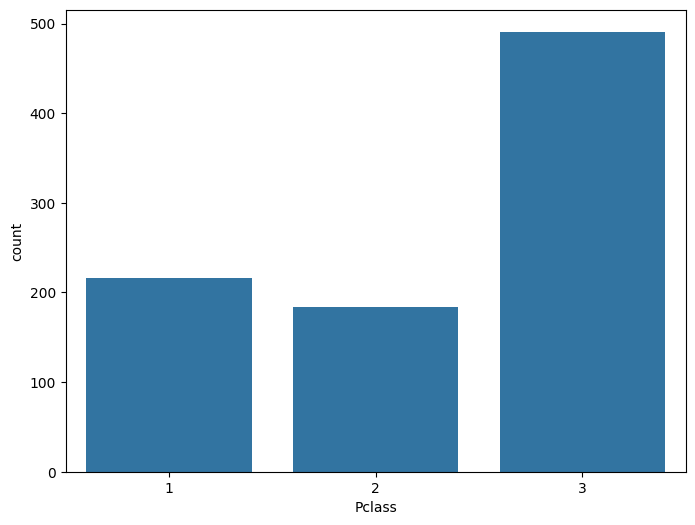

In [92]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Pclass", data=df)
plt.show()

In [116]:
#Frequency distribution of Survived variable wrt Pclass
df.groupby('Pclass')['Survived'].value_counts(0)



#Comment
#cp variable contains four integer values  1, 2 and 3.

#Survived variable contains two integer values 1 and 0 : (1 = Survived; 0 = did not survive)

#So, the above analysis gives Survived variable values 
# categorized into survived and did not survive and groupby Pclass variable values.

#We can visualize this information below.
#graph below

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

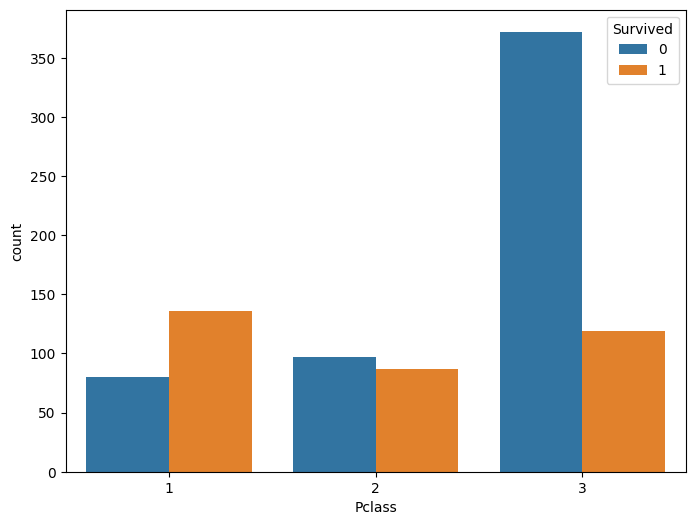

In [94]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

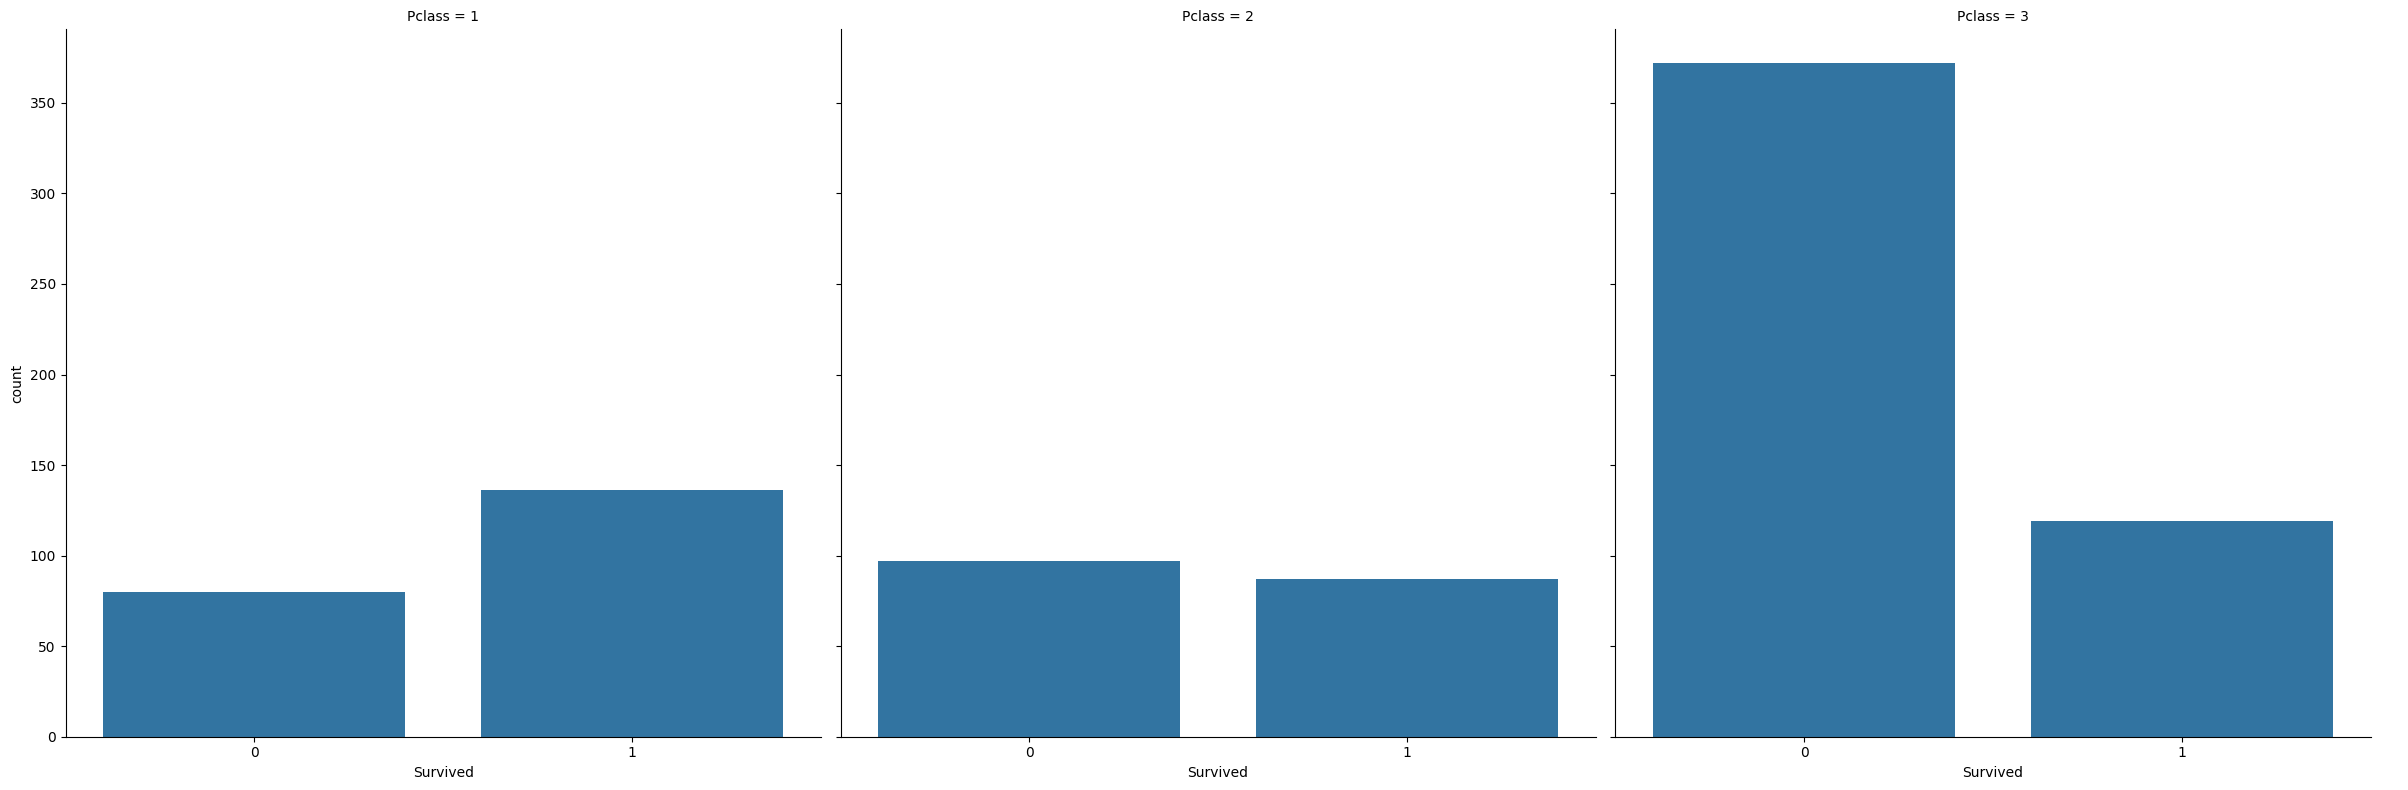

In [95]:
#alternative plot

ax = sns.catplot(x="Survived", col="Pclass", data=df, kind="count", height=8, aspect=1)


#lots of people in PC3 class did not survive

In [96]:
#Analysis of Survived and Fare variable

df['Fare'].nunique()

#Fare is a numerical value

248

/var/folders/9s/6gfwknn53vsfn336v036r0yr0000gp/T/ipykernel_95195/3643636872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10)


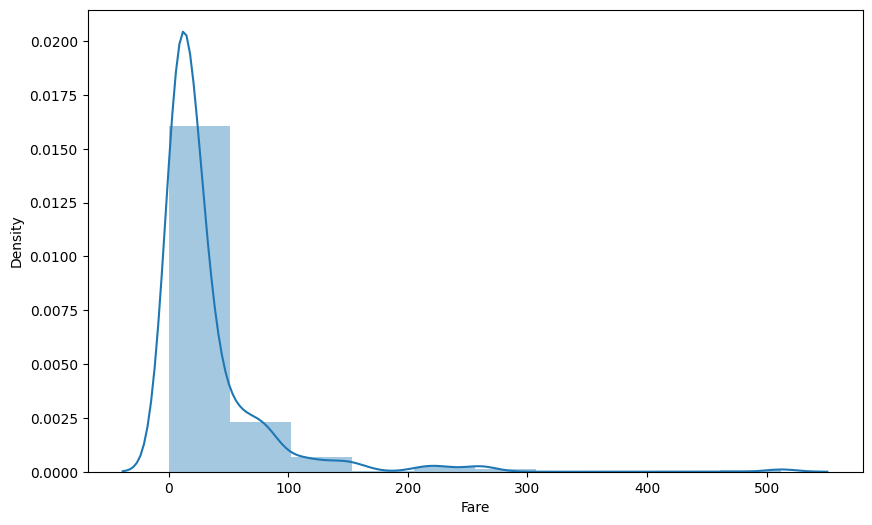

In [97]:
#Visualize the frequency distribution of Fare variable¶

f, ax = plt.subplots(figsize=(10,6))
x = df['Fare']
ax = sns.distplot(x, bins=10)
plt.show()

#we can see that the variable Fare is heavily skewed left

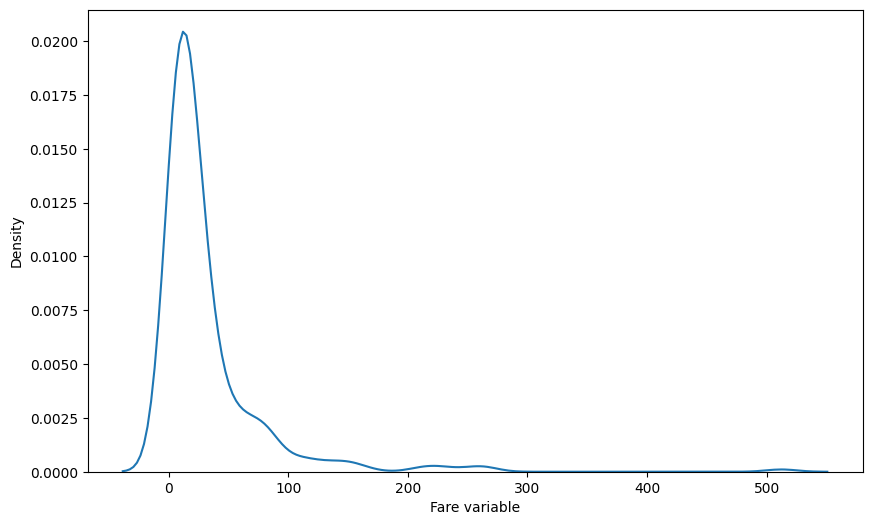

In [98]:
#Seaborn Kernel Density Estimation (KDE) Plot 
# The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.
# The KDE plot plots the density of observations on one axis with height along the other axis.





f, ax = plt.subplots(figsize=(10,6))
x = df['Fare']
x = pd.Series(x, name="Fare variable")
ax = sns.kdeplot(x)
plt.show()

/var/folders/9s/6gfwknn53vsfn336v036r0yr0000gp/T/ipykernel_95195/1736493669.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x, shade=True, color='r')


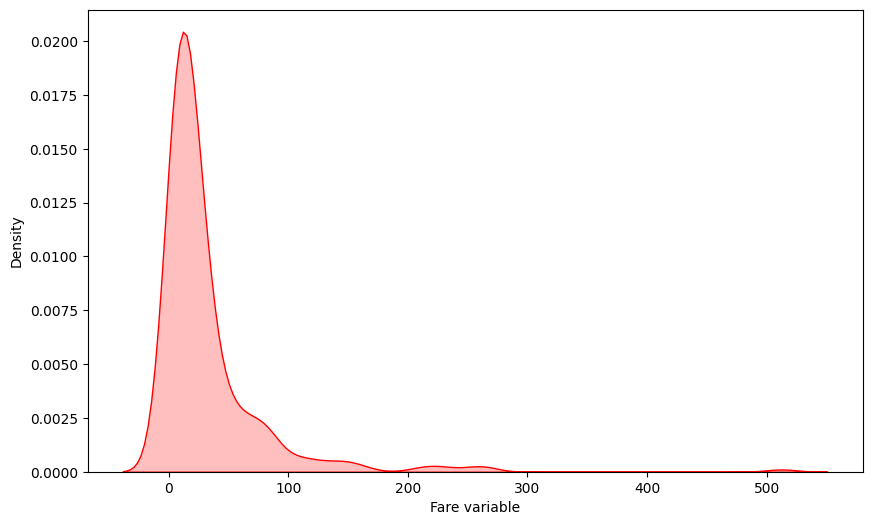

In [99]:
#shade under density curve


f, ax = plt.subplots(figsize=(10,6))
x = df['Fare']
x = pd.Series(x, name="Fare variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

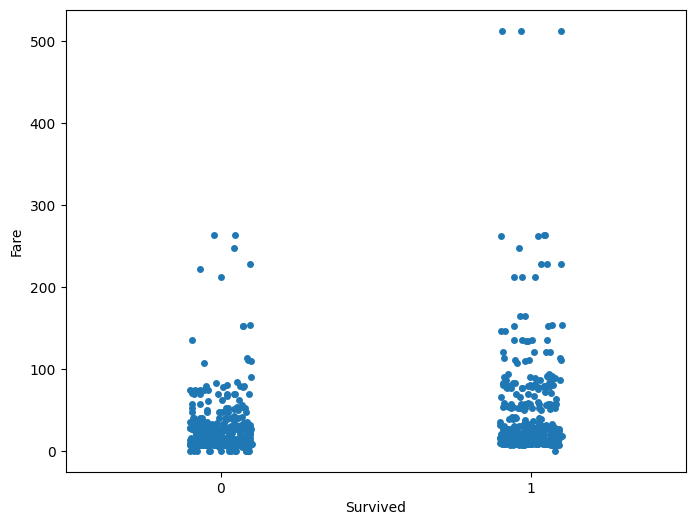

In [100]:
#Visualize frequency distribution of Fare variable wrt Surveved


f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Survived", y="Fare", data=df)
plt.show()

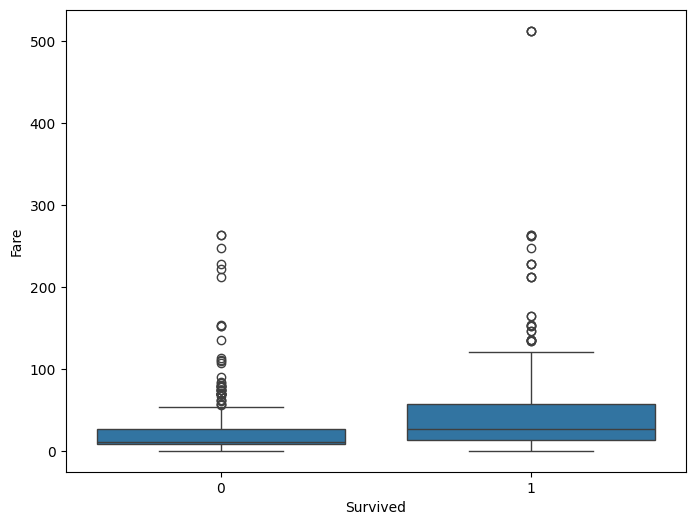

In [101]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.show()

In [102]:
#remove outlier for clearer graph

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [103]:


q = df["Fare"].quantile(0.99)
df[df["Fare"]<q].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,705.000000,882.000000,882.000000,882.000000
mean,446.435374,0.379819,2.321995,29.688184,0.512472,0.368481,29.002508
std,257.357635,0.485617,0.829749,14.537360,1.096047,0.791013,36.569302
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,247.520800


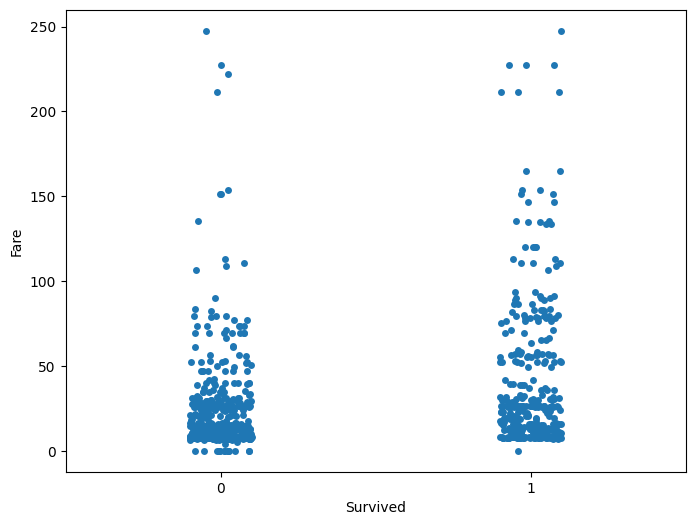

In [104]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()


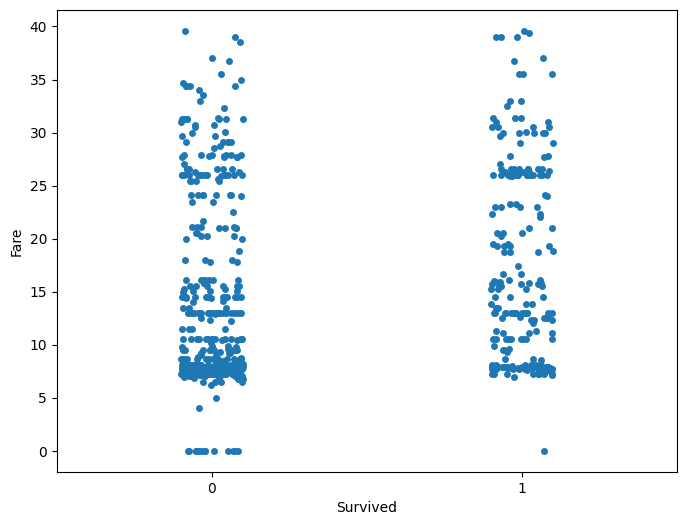

In [105]:

q = df["Fare"].quantile(0.80)
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()

#with this plot we can make an interpretation that there was a more even distribution of price of fares
#and survived variable, but the lower prices fares are cramed with the lower left ( did not survive)

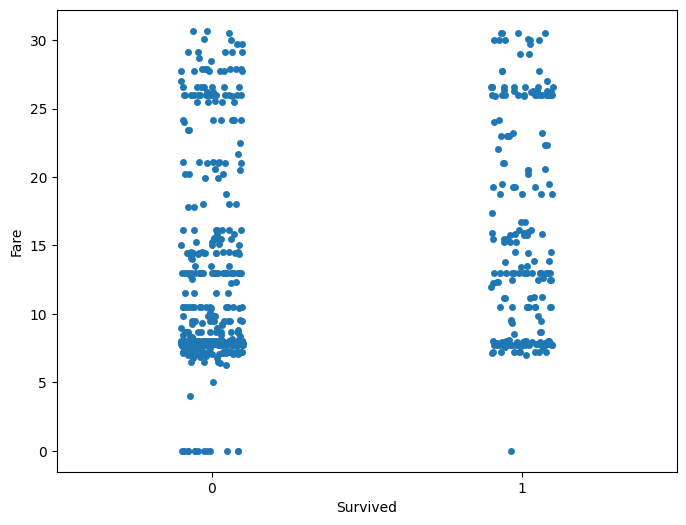

In [106]:
q = df["Fare"].quantile(0.75)
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()

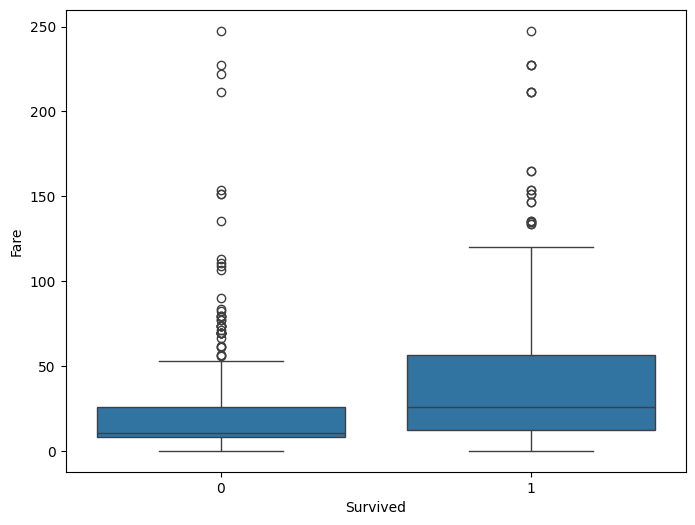

In [107]:

q = df["Fare"].quantile(0.99)

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()

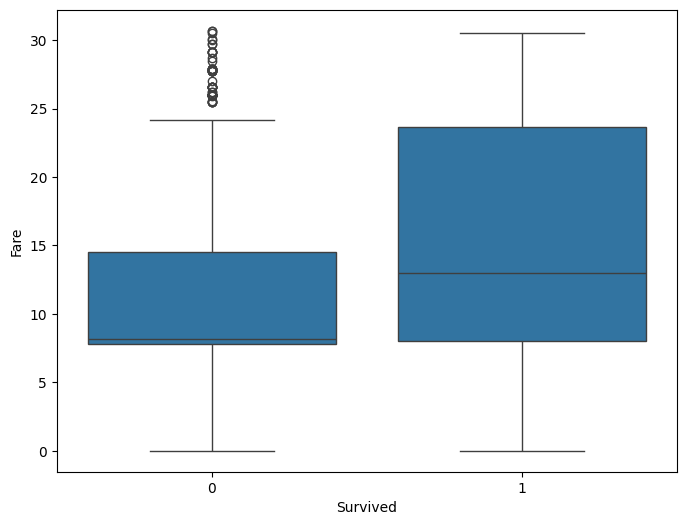

In [108]:
q = df["Fare"].quantile(0.75)

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()

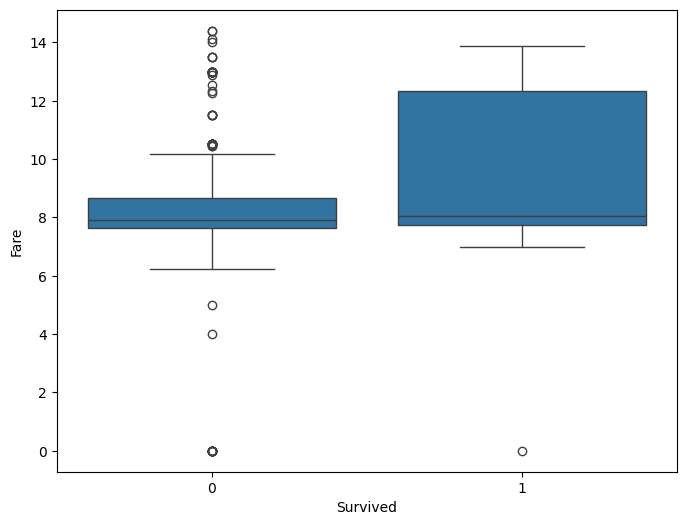

In [109]:
q = df["Fare"].quantile(0.50)

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df[df["Fare"]<q])
plt.show()

In [110]:
#analyzing where pclass=3

df_pc_3 = df[df["Pclass"]==3]
df_pc_3.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [111]:
correlation['Pclass'].sort_values(ascending=False)

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64

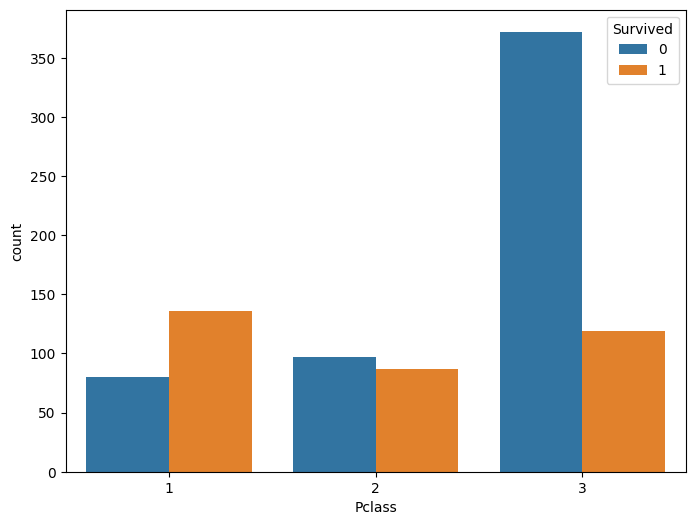

In [121]:
#Visualize frequency distribution of Fare variable wrt Surveved

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

In [117]:
df.groupby('Pclass')['Survived'].value_counts(0)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [120]:
df.groupby('Pclass')['Survived'].value_counts(1)*100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

In [138]:
df.groupby('Survived')[['Pclass','Age']].corr().unstack().iloc[:,1]


Survived
0   -0.434168
1   -0.418073
Name: (Pclass, Age), dtype: float64

In [139]:
df.groupby('Survived')[['Pclass','Fare']].corr().unstack().iloc[:,1]

Survived
0   -0.517378
1   -0.538125
Name: (Pclass, Fare), dtype: float64

In [144]:
s = df.xs('Pclass', axis=1, level=1).corrwith(df.xs('Survived', axis=1, level=1))
print (s)

TypeError: Index must be a MultiIndex

In [ ]:
print("""
      
      Findings of Bivariate Analysis are as follows –

There is no variable which has strong positive correlation with Survived variable.

There is no variable which has strong negative correlation with Survived variable.

The Fare and Pclass variables are mildly correlated with Survived variable.

We can see that the Fare variable is slightly negatively skewed.

The people suffering from heart disease (Survived = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (Survived = 0).

The people suffering from heart disease (Survived = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (Survived = 0).
      """)